In [1]:
import numpy as np
import matplotlib.pyplot as plt
import edward as ed
import tensorflow as tf
plt.rcParams['figure.figsize'] = (32.0, 24.0)
plt.rcParams['font.size'] = 24

(50,)


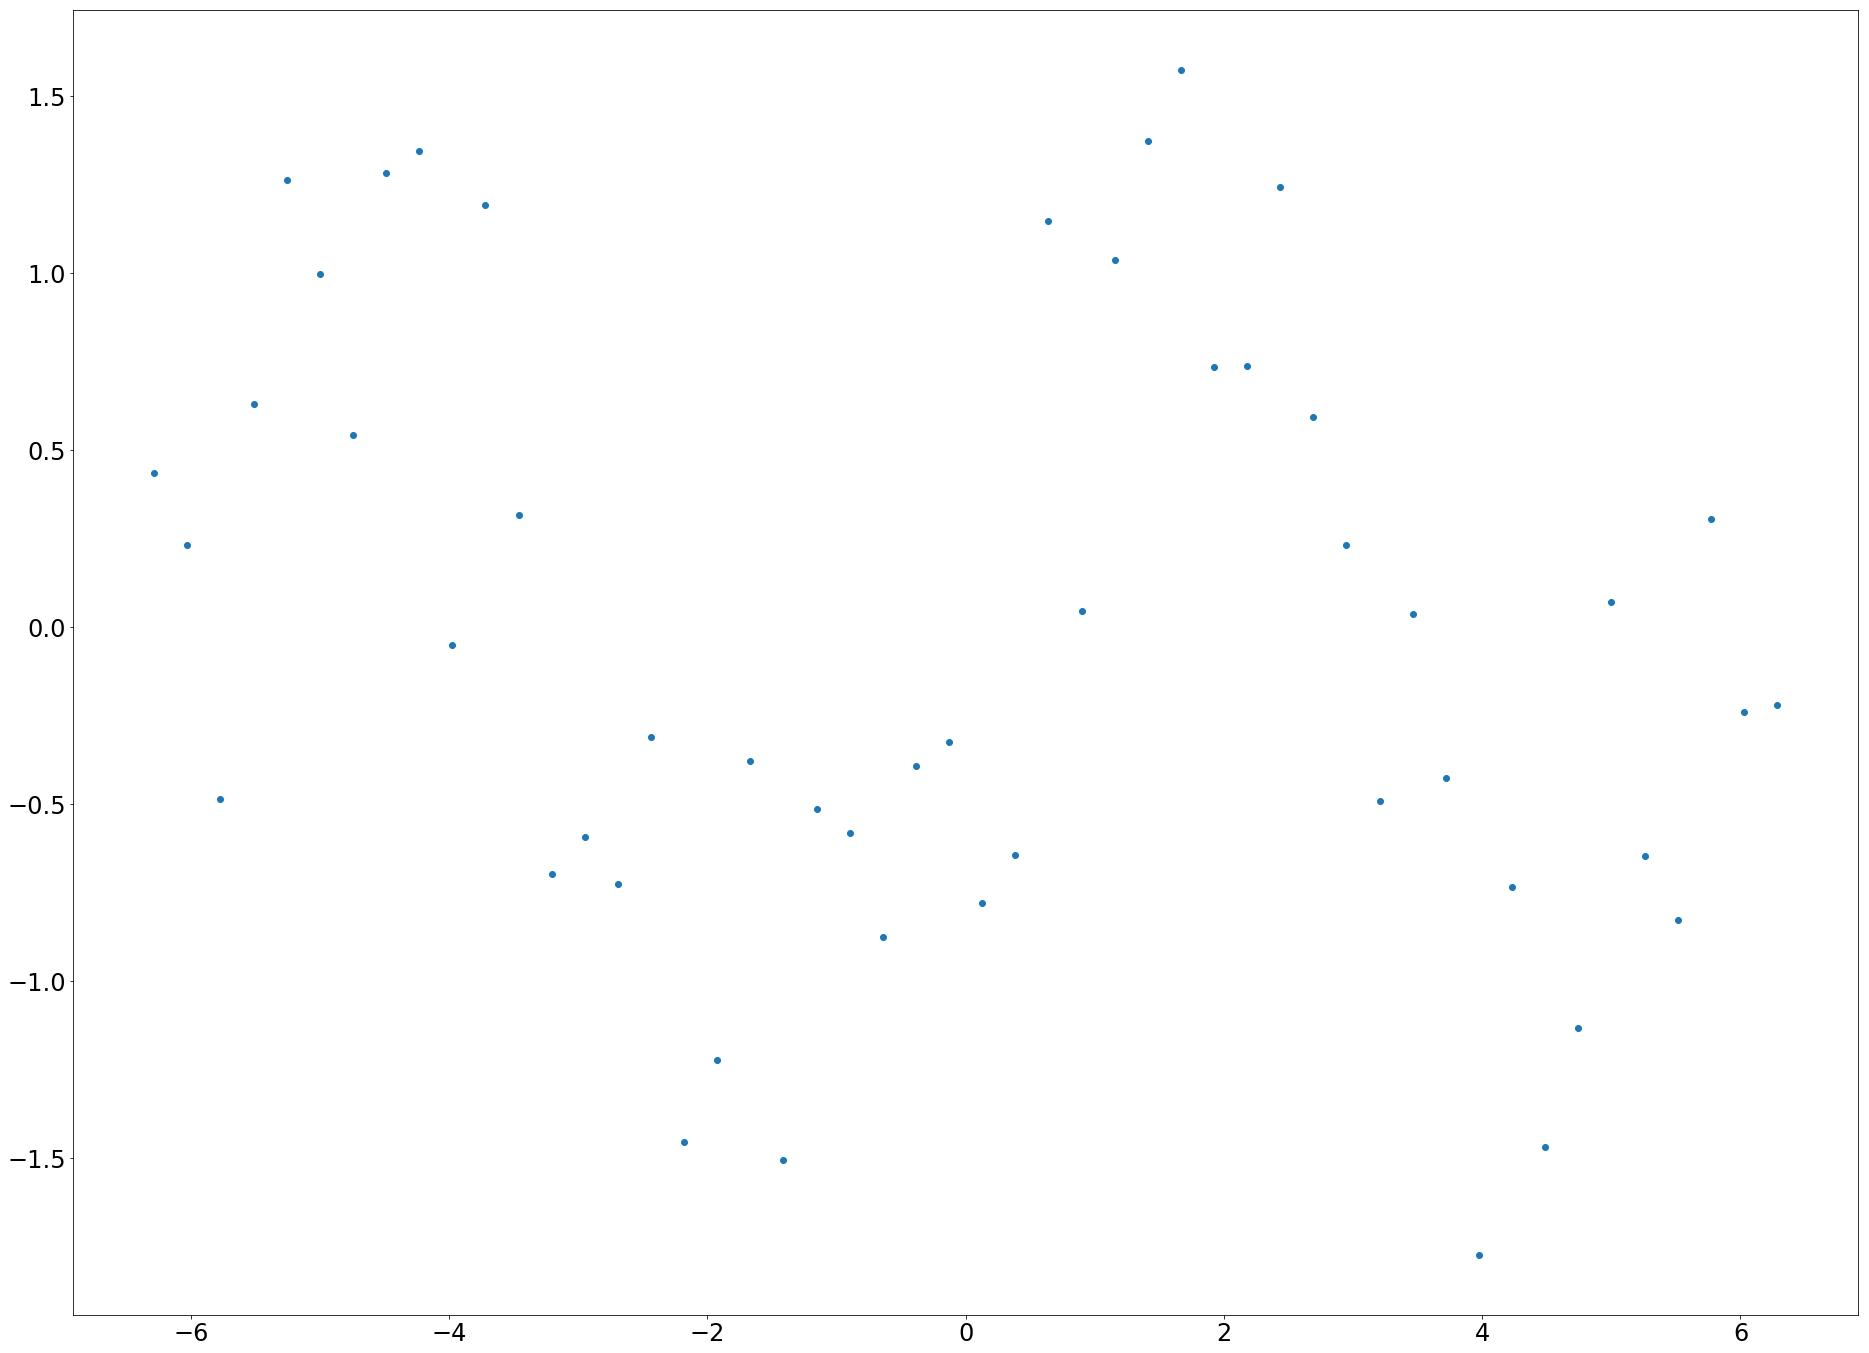

In [128]:
def make_dataset(N, noise_std=0.5):
    x = np.linspace(-2 * np.pi, 2 * np.pi, N)
    y = np.sin(x) + np.random.normal(0, noise_std, size=N)
    return x, y

N = 50
x_train, y_train = make_dataset(N)
print(y_train.shape)

plt.scatter(x_train, y_train)
plt.show()

In [129]:
from edward.models import MultivariateNormalTriL, Normal
from edward.util import rbf

X = tf.placeholder(tf.float32, [N, 1])
f = Normal(loc=tf.zeros(N), scale=tf.diag_part(rbf(X)))
y = Normal(loc=f, scale=tf.ones(N))

In [130]:
qf = Normal(loc=tf.Variable(tf.random_normal([N])),
            scale=tf.nn.softplus(tf.Variable(tf.random_normal([N]))))

inference = ed.KLqp({f: qf}, data={X: x_train.reshape(-1, 1), y: y_train})
inference.run(n_iter=500)

500/500 [100%] ██████████████████████████████ Elapsed: 2s | Loss: 68.6550s | Loss: 70.3


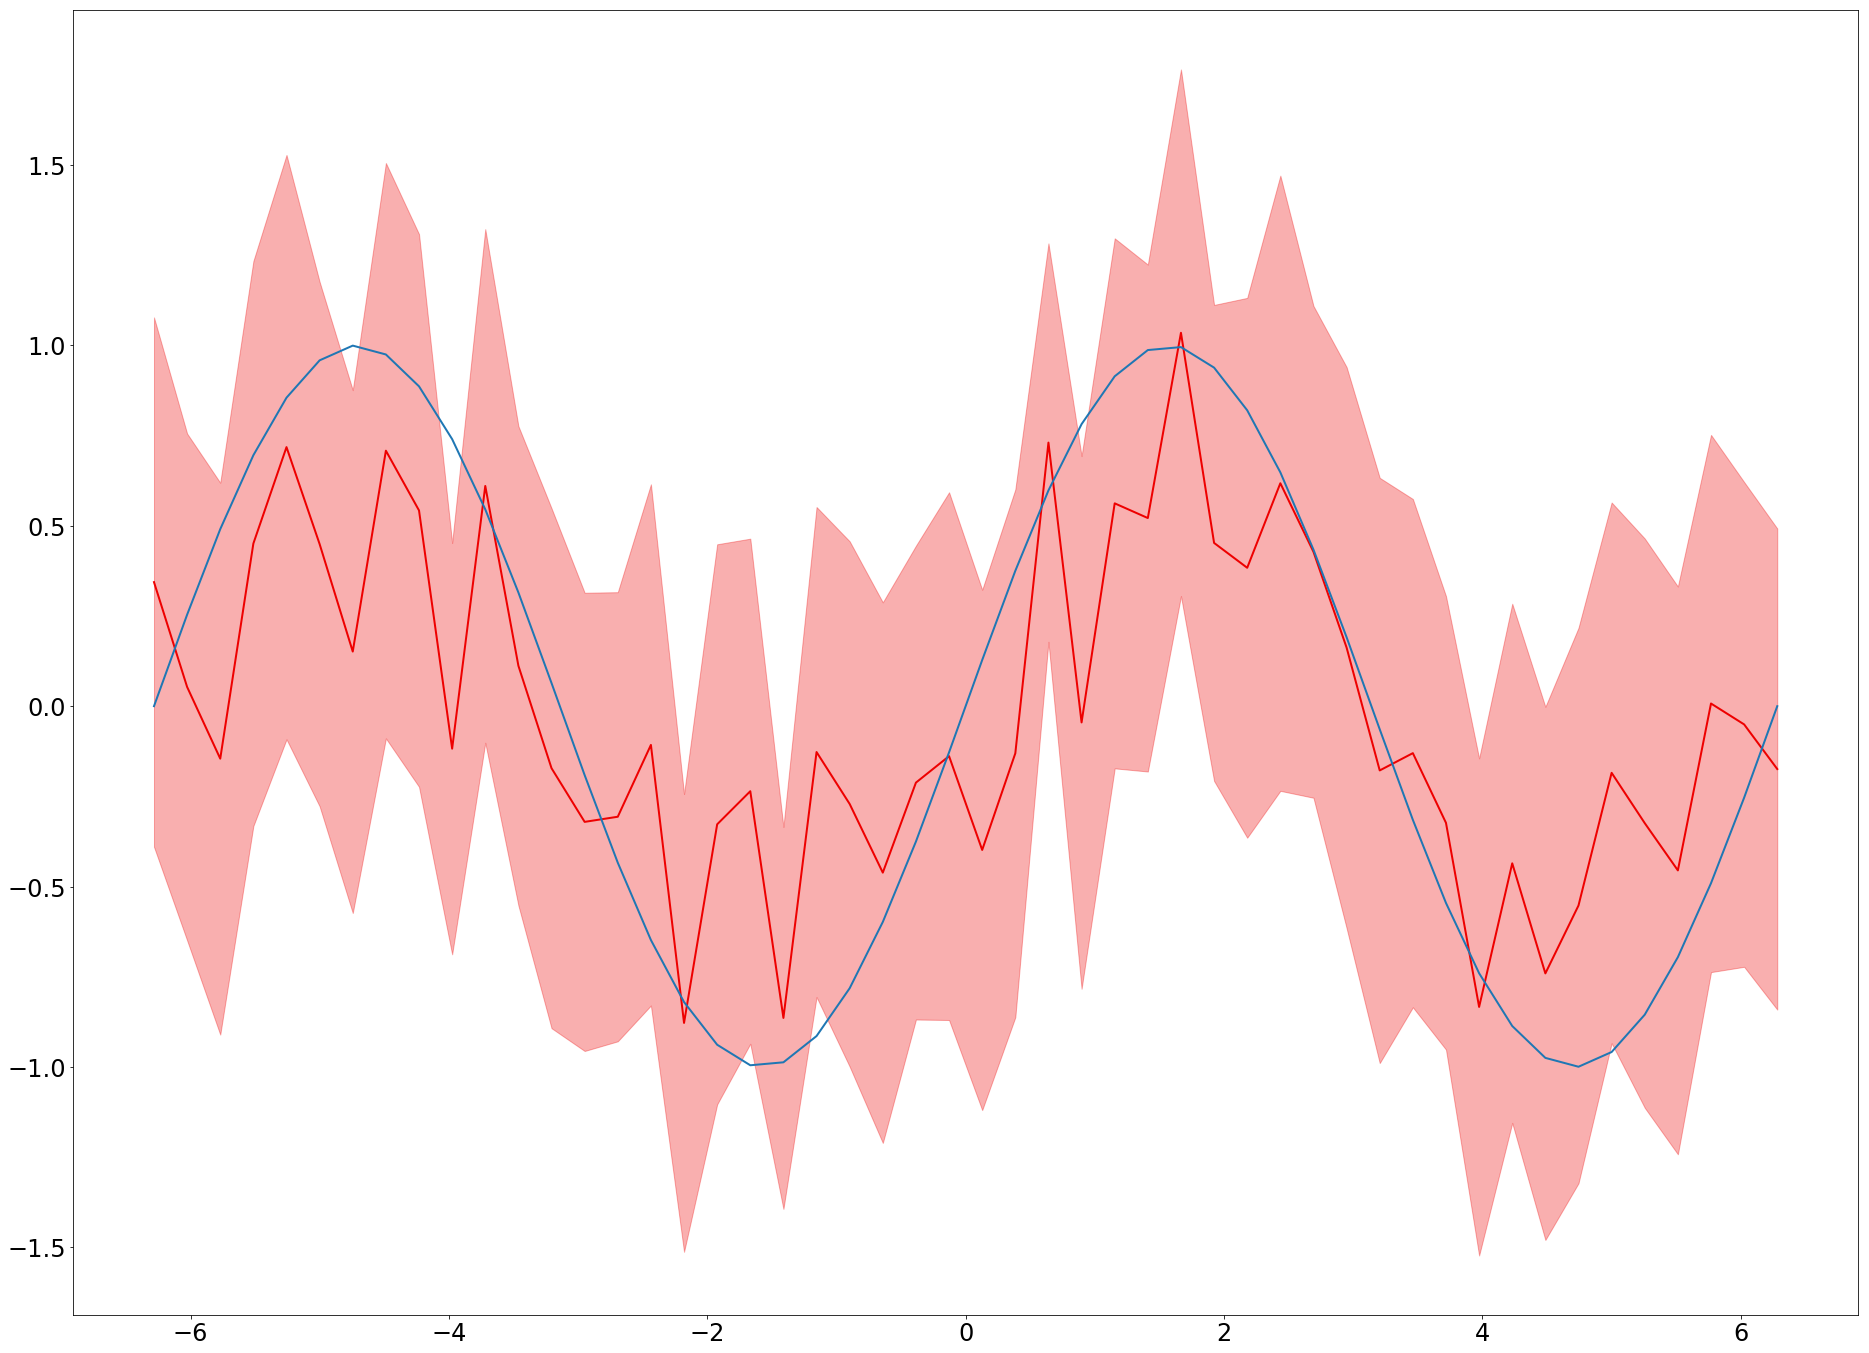

In [131]:
mean = qf.mean().eval()
scale = qf.scale.eval()
plt.fill_between(x_train, mean + scale, mean - scale, color='#ee000050')
plt.plot(x_train, qf.mean().eval(), linewidth=2, color='#ee0000')
plt.plot(x_train, np.sin(x_train), linewidth=2)
plt.show()